# Feature extraction

This part of the course is about detecting features like lines and circles from images.

Run the code making sure you understand the syntax. Complete the parts marked **TODO** either in the text or in the code.

## Setup

First, we need to import some packages so that their functions are available to us.

In [29]:
import os                       # operating system operations like file paths etc
import numpy as np              # multidimensional arrays, linear algebra
from skimage import morphology  # morphological operations
from skimage import io          # to load and save data
from skimage import color       # color conversion utilities
from skimage import segmentation
from skimage import exposure
from skimage.util import invert   # invert an image (if binary, black->white, white->black)
from skimage import img_as_ubyte # Convert an image to 8-bits
from skimage.filters import threshold_otsu # Otsu's thresholding method
from skimage.feature import canny
from skimage.transform import hough_circle, hough_circle_peaks


import matplotlib.pyplot as plt # plotting


path_to_images= './data'    # where the images are relative to this notebook. On Nuvolos, you may need to provide an absolute path

## Data loading and exploration

Let's start with our previous blastoma image.

Image has shape (512, 640)


Text(0.5, 1.0, 'Original image')

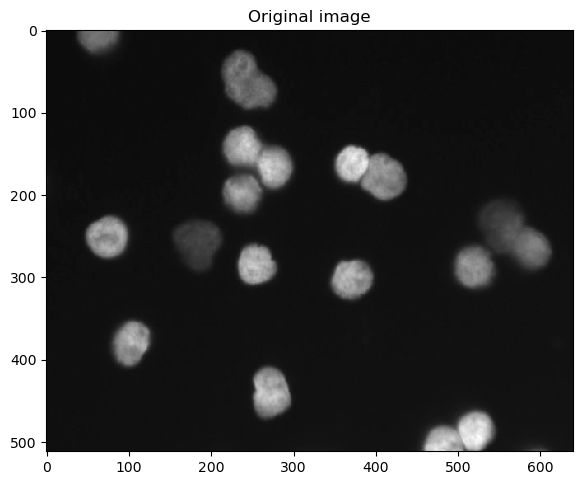

In [31]:
# Load and normalize the neuroblastoma image
image_file = os.path.join(path_to_images, 'neuroblastoma_5_orig_small.jpg')
img = io.imread(image_file)
img = img/np.max(img) # normalize the image to [0,1]
print(f'Image has shape {img.shape}')

# Display the image
plt.figure()
io.imshow(img)
plt.title('Original image')

## Edge detection

Edge detections allows us to find regions of the image with sharp contrast, that is where dark rapidly becomes bright and vice-versa. These edges may not correspond to human perception.


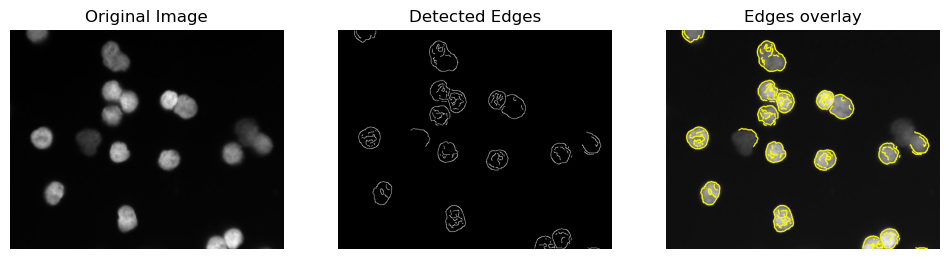

In [32]:
# Apply histogram equalization to improve contrast
#img = exposure.equalize_hist(img)

# Detect edges using Canny edge detector
edges = canny(img)

# create an overlay of the edges on the original image
edges_overlay = segmentation.mark_boundaries(img, np.array(edges,dtype=np.uint8), mode='thick')

# Display the original image and the detected edges side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Detected Edges')
axes[1].axis('off')
axes[2].imshow(edges_overlay)
axes[2].set_title('Edges overlay')
axes[2].axis('off')

plt.show()





## Hough transform

The Hough transform allows us to detect lines, circles, and other shapes.

Detected 10 circles


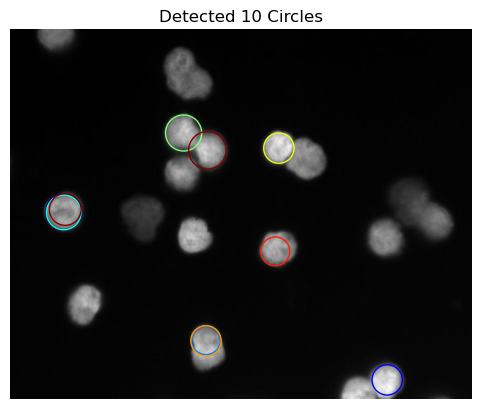

In [57]:

# Define the range of radii to search for circles
min_radius = 20
max_radius = 50

# Apply the Hough transform to detect circles
hough_radii = np.arange(min_radius, max_radius + 1)
hough_res = hough_circle(edges, hough_radii)

# Find the most prominent circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=10)
n_circles=radii.shape[0]
print(f'Detected {n_circles} circles')


# Display the original image with detected circles in different colors
cm=plt.cm.jet # get a colormap
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')

for i, (center_y, center_x, radius) in enumerate(zip(cy, cx, radii)):
    circle = plt.Circle((center_x, center_y), radius, color=cm(i/(n_circles-2)), fill=False)
    ax.add_patch(circle)

plt.title(f'Detected {n_circles} Circles')
plt.axis('off')
plt.show()


## Second order approaches

Laplacian of Gaussian (LoG)

In [52]:
cm=plt.cm.jet
print(cm(4/5))

(1.0, 0.40740740740740755, 0.0, 1.0)


Detected 13 blobs


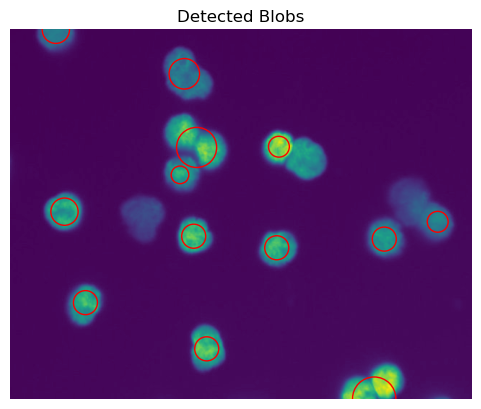

In [37]:
from skimage.feature import blob_log

# Define the range of blob sizes to detect
min_sigma = 10
max_sigma = 30

# Perform blob detection using LoG
blobs = blob_log(img, min_sigma=min_sigma, max_sigma=max_sigma)
print(f'Detected {blobs.shape[0]} blobs')

# Display the detected blobs
fig, ax = plt.subplots()
ax.imshow(img)

for blob in blobs:
    y, x, radius = blob
    circle = plt.Circle((x, y), radius, color='r', fill=False)
    ax.add_patch(circle)

plt.title('Detected Blobs')
plt.axis('off')
plt.show()
